<a href="https://colab.research.google.com/github/ToukirSabugar/GD-WITH-BACKPROPAGATION/blob/main/gd_back1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
xx=x_train.reshape(60000, 784)
yy=to_categorical(y_train)

In [ ]:
xx = np.array([[1, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 1]])

In [ ]:
xx.shape

(4, 3)

In [ ]:
yy=np.array([1,0,1,0])

In [ ]:

inputSize = 3
outputSize = 1
hiddenSize = 10

#weights
#W1 = np.random.randn(inputSize, hiddenSize) # (3x2) weight matrix from input to hidden layer
#W2 = np.random.randn(hiddenSize, outputSize) # (3x1) weight matrix from hidden to output layer

W1 = np.random.normal(0,1,[inputSize, hiddenSize]) # (3x2) weight matrix from input to hidden layer
W2 = np.random.normal(0,1,[hiddenSize, outputSize]) # (3x1) weight matrix from hidden to output layer

In [ ]:
def sigmoid(X):
  # activation function 
  return 1/(1+np.exp(-X))

In [ ]:
def sigmoid_prime(X):
  # Derivative of activation function 
  return sigmoid(X)*(1-sigmoid(X))

In [ ]:

#For Forward Pass
def forward(X,W1,W2):
  H1 = np.dot(X, W1) # dot product of X (input) and first set of 3x2 weights
  H1_Activation = sigmoid(H1)
  H2 = np.dot(H1_Activation, W2) # dot product of hidden layer (z2) and second set of 3x1 weights
  H2_Activation = sigmoid(H2)
  Output = H2_Activation
  return H1_Activation , Output,H1,H2

In [ ]:
def backward(X,W1,W2,H1,H2, H1_Activation,Output,y,LR):
  LR = LR
  # For Backward Pass
  Output_Error = y - Output

  #Output_Delta = 2*Output_Error*sigmoid_prime(Output) # Appying the derivative of the Activation to The Eroor
  Output_Delta = 2*Output_Error*sigmoid_prime(H2) # Appying the derivative of the Activation to The Eroor

  # Calculating How much Hidden Layer Weight Contributing to the output Error
  H2_Error = Output_Delta.dot(W2.T)

  # Apply The derivative of the Activation Function

  #Hidden_Layer_Delta = H2_Error*sigmoid_prime(H1_Activation)
  Hidden_Layer_Delta = H2_Error*sigmoid_prime(H1)

  # Update W2
  #gradW2 = H1_Activation.T.dot(Output_Delta)
  
  W2 += LR*H1_Activation.T.dot(Output_Delta)
  #W2 = Adam(W2,gradW2,LR)

  # Update W1
  #gradW1 = X.T.dot(Hidden_Layer_Delta)
  W1 += LR*X.T.dot(Hidden_Layer_Delta)
  #W1 = Adam(W1,gradW1,LR)
  
  return W1, W2

In [ ]:
def train(X,W1,W2,y,LR):
  H1_Activation,Output,H1,H2 = forward(X,W1,W2)
  [W1,W2] = backward(X,W1,W2,H1,H2,H1_Activation,Output,y,LR)
  return W1, W2

In [ ]:
Images=xx

In [ ]:
Images[3,:]

array([0, 1, 1])

Epoch 0
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Epoch 1
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Epoch 2
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Epoch 3
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Epoch 4
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Percentage of Accuracy % =  50.0 %
Epoch 5
Percentage of Accuracy % =  25.0 %
Percentage of Accuracy % =  25.0 %
Percent

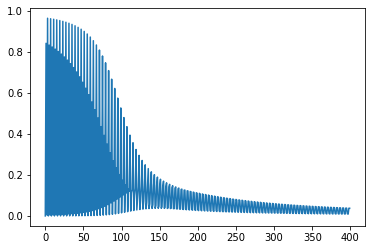

In [ ]:

Store =[]

LR = 0.1

for epoch in range(100):
  print("Epoch", epoch)
  Images=xx
  encoded_Labls = yy
  Accurate = 0.0
  for ii in range(4): # trains the NN 1,000 times

      X = Images[ii,:].reshape([1,3])
      y = encoded_Labls[ii].reshape([1,1])
      [W1,W2] = train(X,W1,W2,y,LR)


      #print ("Predicted Output: \n" + str(forward(X,W1,W2)))
      _,Updated_output,_,_ = forward(X,W1,W2)
      Losss = np.mean(np.square(y - Updated_output ))   
      Store.append(Losss)
      Actual_No = np.round_(y)
      Predicted = np.round_(Updated_output)
      if Actual_No == Predicted:
        Accurate +=1
      Percent_accuracy = (Accurate / 4)*100
      print("Percentage of Accuracy % = ", Percent_accuracy,"%")
      
  print("Percentage of Accuracy % = ", Percent_accuracy,"%")
  
plt.plot(Store)
plt.show()
